<html> 
    <h1 style="color:red; background-color: yellow; text-align: center;">Lane Detection<h1> 
</html>

#### Code link: (https://www.analyticsvidhya.com/blog/2020/05/tutorial-real-time-lane-detection-opencv/)
#### Video used for detection: 

https://pixabay.com/videos/highway-germany-drive-traffic-10364/

#### Use for experimenting
https://pixabay.com/videos/road-driving-motorway-freeway-1101/

https://pixabay.com/videos/road-driving-motorway-freeway-1101/

#### 
#### Lane detection is the task of detecting lanes on a road from a camera

<p><cite>“A lane is part of a roadway (carriageway) that is designated to be used by a single line of vehicles, to control and guide drivers and reduce traffic conflicts.” </cite></p>

<html>
    <img src="Lanedetection.jpg" >
</html>

## Importing the libraries

In [1]:
# os module provides a portable way of using operating system dependent functionality
import os
# re module provides regular expression matching operations similar to those found in Perl
import re
# OpenCV (Open Source Computer Vision Library: http://opencv.org) is an open-source library 
#that includes several hundreds of computer vision algorithms.
import cv2
# NumPy is a Python library used for working with arrays.
## It also has functions for working in domain of linear algebra, fourier transform, and matrices.
import numpy as np
# tqdm is a Python library that allows you to output a smart progress bar by wrapping around any iterable
from tqdm import tqdm
# matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt

## Displaying the input video

In [60]:
# create a display object given raw data
from IPython.display import HTML

# path of the input video
path = 'Highway_1.mp4'

# html snippet to display the input video
HTML("""
<video width="720" height="340" controls>
  <source src=""" + 'Videos/' + path + """ type="video/mp4">
</video>
""")

## Extracting the frames from the video and saving (link: https://theailearner.com/2018/10/15/extracting-and-saving-video-frames-using-opencv-python/)

In [6]:
# checking if the path to store the frame exists, if yes then pass else create the directory on the
# video file name
if os.path.isdir('Videos/'+ path.split('.')[0]):
    pass
else:
    os.mkdir('Videos/'+ path.split('.')[0])
    
# capturing the video from the specified path to cap variable    
cap = cv2.VideoCapture('Videos/' + path)

# initialize the variable to help in naming frames
i = 0

# while frames exists in the video loop over
while(cap.isOpened()):
    # read the frames and frame returned(True/ False) from the cap video object
    ret, frame = cap.read()
    # if not frames returned break from loop, else continue
    if ret == False:
        break
    # resize the frame to required dimension    
    frame = cv2.resize(frame, (480, 270))
    # write the resized frame to the required path
    cv2.imwrite('Videos/'+ path.split('.')[0] + '/Highway'+str(i)+'.jpg', frame)
    # increment the count to be used in the next frame names
    i += 1

# releases the video object
cap.release()
# destroys all the open windows
cv2.destroyAllWindows()

## Load the frames

In [7]:
# get file names of frames
col_frames = os.listdir('Videos/'+ path.split('.')[0] + '/')
# sort the frames as per the numbering in frames (re.sub replaces the all the non digit charaters to empty string)
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# load images
col_images=[]

# loop over the frames and extract the image to the list
# tqdm helps in displaying the progress bar
for i in tqdm(col_frames):
    # reading the image array using the open cv from the frame
    img = cv2.imread('Videos/'+ path.split('.')[0] + '/' + i)
    # appending the image array to the list in order
    col_images.append(img)

100%|██████████| 778/778 [00:03<00:00, 194.88it/s]


## Displaying single frame and btaining the region of interest

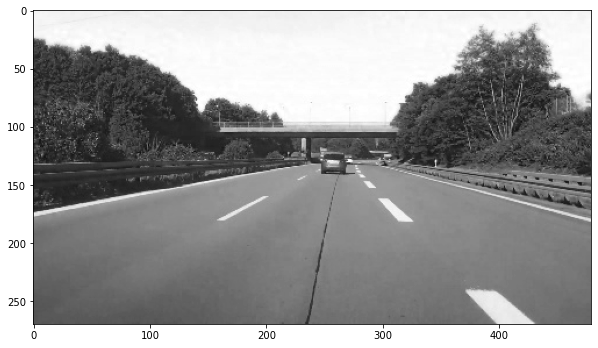

In [8]:
# specify frame index
idx = 457

# plot frame
plt.figure(figsize=(10,10))
# col_images[idx][:,:,0] is red component of the image
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()

## Create polygon to get the region of interest

In [9]:
# create a zero array
stencil = np.zeros_like(col_images[idx][:,:,0])

# specify coordinates of the polygon
# polygon = np.array([[50,270], [220,160], [360,160], [480,270]])
polygon = np.array([[0,270], [130,160], [350,160], [450,270]])

# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=uint8)

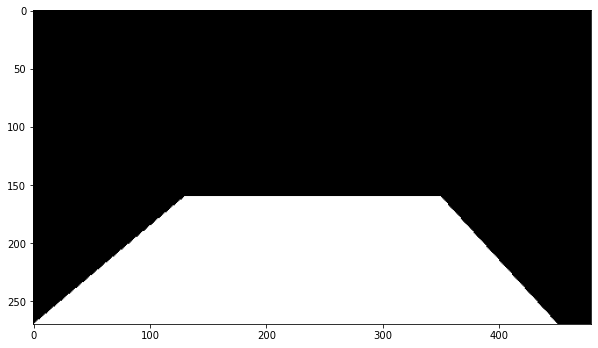

In [10]:
# plot polygon
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

## Masking the image with the polygon mask and get region of interest (link: https://www.pyimagesearch.com/2021/01/19/image-masking-with-opencv/)

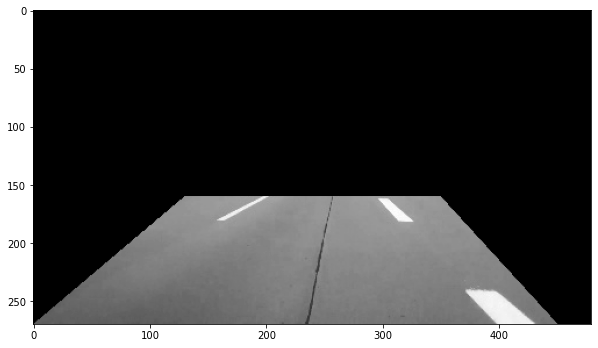

In [11]:
# apply polygon as a mask on the frame
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

## Applying the threshold to get the binary image containing only lanes

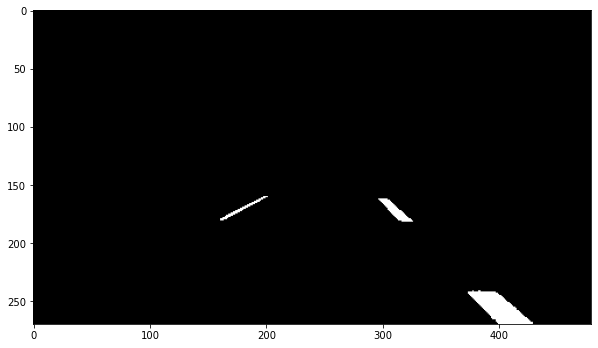

In [12]:
# apply image thresholding
ret, thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

## Hough Line Transform and displaying the detected lanes

### Hough Line Transform (link: https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html)

1. The Hough Line Transform is a transform used to detect straight lines.
2. To apply the Transform, first an edge detection pre-processing is desirable.

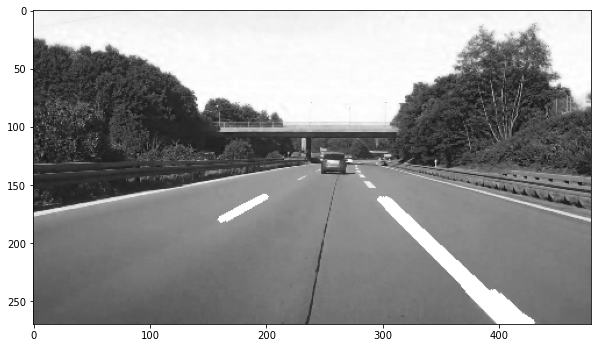

In [13]:
# Hough Line Transform is a transform used to detect straight lines
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images[idx][:,:,0].copy()

# draw Hough lines
for line in lines:
    # get the lines coordinates
    x1, y1, x2, y2 = line[0]
    # plot the lines in the image
    cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

## Applying Hough Line Transform to all the frames in the input video and create the new frames for each

In [24]:
# The shutil module offers a number of high-level operations on files and collections of files
import shutil
# initialize the variable to help in naming frames
cnt = 0

# loop through each image
for img in tqdm(col_images):
    # apply frame mask
    masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)
    
    # apply image thresholding
    ret, thresh = cv2.threshold(masked, 220, 255, cv2.THRESH_BINARY)

    # apply Hough Line Transformation
    lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
    dmy = img.copy()
    
    # delete the existing 'detected' directory and create new 
    if os.path.isdir('detected'):
        shutil.rmtree('detected')
        os.mkdir('detected')
    else:
        os.mkdir('detected')

    # Plot detected lines
    try:
        for line in lines:
            # get the lines coordinates
            x1, y1, x2, y2 = line[0]
            # plot the lines in the image
            cv2.line(dmy, (x1, y1), (x2, y2), (0, 255, 0), 3)
        # save the new frame in the folder detected
        cv2.imwrite('detected/'+str(cnt)+'.png',dmy)

    except TypeError: 
        # incase of error save the old frame image
        cv2.imwrite('detected/'+str(cnt)+'.png',img)
        
    # increment the count to be used in the next frame names    
    cnt+= 1


100%|██████████| 778/778 [00:15<00:00, 49.14it/s]


In [44]:
# input frames path
pathIn= 'detected/'

# output path to save the video
pathOut = path.split('.')[0] + '_output.mp4'

# specify frames per second
fps = 30.0

In [45]:
# os module provides isfile to check if the mentioned is a file and join to combine the file paths
from os.path import isfile, join

# get file names of the frames
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
# sort the frames as per the numbering in frames (re.sub replaces the all the non digit charaters to empty string)
files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [46]:
# to store the images
frame_list = []

# loop over the files
for i in tqdm(range(len(files))):
    # get the image path full name
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    # get the height, width and channel details
    height, width, layers = img.shape
    # creating the size tuple from the width and height obtained
    size = (width,height)
    
    #inserting the frames into an image array
    frame_list.append(img)

100%|██████████| 778/778 [00:05<00:00, 154.41it/s]


## Saving the frames to MP4 video format with MPEG4 Codec (link: https://docs.opencv.org/3.4/dd/d9e/classcv_1_1VideoWriter.html)

### FourCC is a 4-byte code used to specify the video codec (link: https://www.fourcc.org/codecs.php)

<ul>
<li>In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)</li>
<li>In Windows: DIVX (More to be tested and added)</li>
<li>In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).</li>
</ul>

<p>FourCC code is passed as  <code>cv.VideoWriter_fourcc('M','J','P','G')</code> or   <code>cv.VideoWriter_fourcc(*'MJPG')</code> for MJPG.</p>

In [47]:
# write the video using the cv2 VideoWriter
out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'DIVX') , fps, size)

# loops through each frame and write as video
for i in range(len(frame_list)):
    # writing to a image array
    out.write(frame_list[i])

# release the VideoWriter Oject
out.release()

## Final Video Output

###  Audio conversion from MPEG-4 Codec to H264 Codec to display in the jupyter notebook (web browsers)

### Install the ffmpeg using the command:  
### sudo apt-get install ffmpeg

### Conversion using the command line (link: https://opensource.com/article/17/6/ffmpeg-convert-media-file-formats)

In [48]:
# output video path with MPEG-4 codec
video_ = path.split('.')[0] + '_output.mp4'
# new output video path with H264 codec
video_new = path.split('.')[0] + '_finaloutput.mp4'

# commandlines to convert MP4 with MPEG-4 codec to H64 codec
!ffmpeg -i {video_} -an -vcodec libx264 -crf 23 {video_new} -y

ffmpeg version 2.8.17-0ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.12) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvo

### Display the video output

In [61]:
# html snippet to display the output video
HTML("""
<video width="720" height="340" controls>
  <source src=""" + path.split('.')[0] + '_finaloutput.mp4' + """  type="video/mp4">
</video>
""")